In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
warnings.simplefilter(action='ignore')
plt.style.use('bmh')


In [83]:
student = pd.read_csv('dataset.csv')

In [84]:
# Set the maximum number of columns displayed when showing DataFrames to 100
pd.options.display.max_columns = 100

In [85]:
student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [86]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame named 'student'
student.shape


(4424, 35)

In [87]:
# Count the number of duplicate rows in the DataFrame 'student'
student.duplicated().sum()

0

In [88]:
# Count the number of missing values in each column of the DataFrame 'student'
student.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [89]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [90]:
student.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


In [91]:
student['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [92]:
# Iterate over each column in the DataFrame 'student' print the count of unique values in the current column
for i in student.columns:
    print("Unique values in", i, "are : " )
    print(student[i].value_counts())
    print("*"*50)

Unique values in Marital status are : 
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
**************************************************
Unique values in Application mode are : 
Application mode
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: count, dtype: int64
**************************************************
Unique values in Application order are : 
Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
**************************************************
Unique values in Course are : 
Course
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: count, dtype: int64
*************************

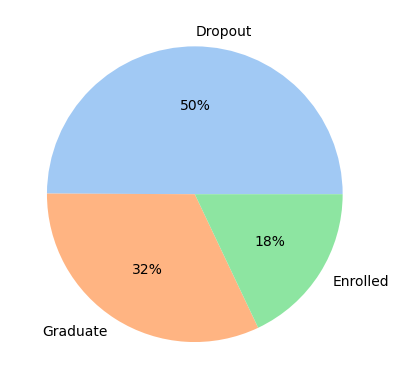

In [93]:
colors = sns.color_palette('pastel')[0:5]
# Create a pie chart to visualize the distribution of values in the 'Target' column
plt.pie(student['Target'].value_counts(), labels = student['Target'].unique(), colors = colors, autopct='%.0f%%')
#plt.legend()
plt.show()

In [94]:
student['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [95]:
# Select columns from the DataFrame 'student' that have the data type 'float64' and assign them to a new DataFrame 'flt_stu'
flt_stu = student.select_dtypes(['float64'])

In [96]:
# Create a new DataFrame 'stu_intvar' containing only the columns related to certain variables of interest from the original DataFrame 'student'
stu_intvar = student[['Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st sem (grade)', 
                      'Curricular units 2nd sem (grade)']]

<Axes: xlabel='value', ylabel='variable'>

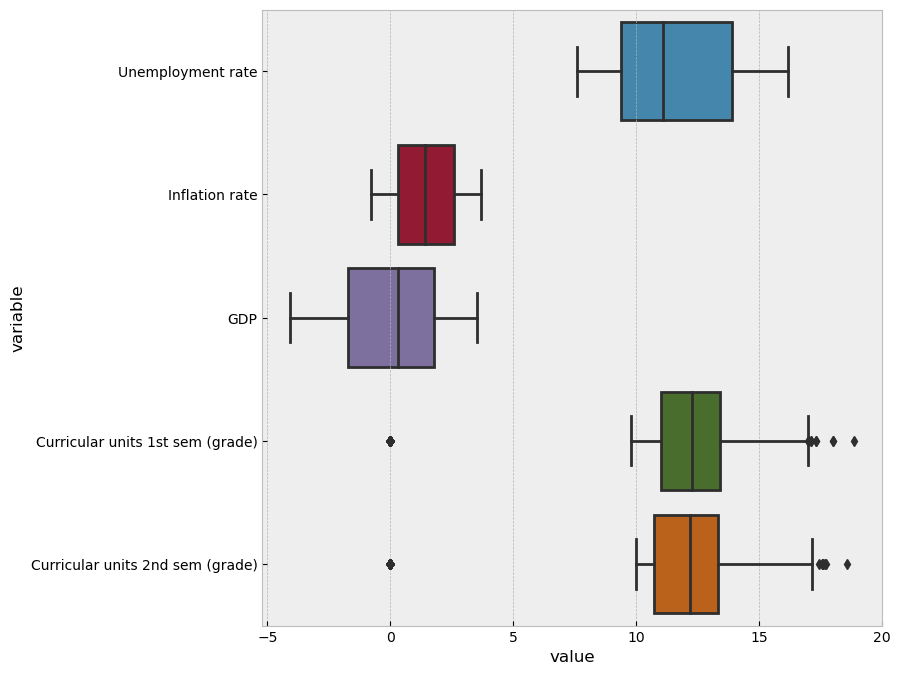

In [97]:
# Create a boxplot to visualize the distribution of values across different variables in the DataFrame 'stu_intvar'
plt.figure(figsize = (8,8))
sns.boxplot(y = "variable", x = "value", data = pd.melt(stu_intvar))

In [98]:
# Generate a combined histogram and boxplot for the given feature(s) in the dataset.
def hist_box(data, features, figsize=(12,7), kde=False, bins=None):
    f2, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex = True,
    gridspec_kw = {'height_ratios' : (0.25, 0.75)},
    figsize = figsize
    )
    sns.boxplot(
    data = data, x = features, ax = ax_box, showmeans = True, color = "violet"
    )
    sns.histplot(
    data = data, x = features, kde=kde, ax = ax_hist, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x= features, kde = kde, ax=ax_hist, 
    )
    ax_hist.axvline(
    data[features].mean(), color = "green", linestyle="--"
    )
    ax_hist.axvline(
    data[features].median(), color = "blue", linestyle = "-"
    )

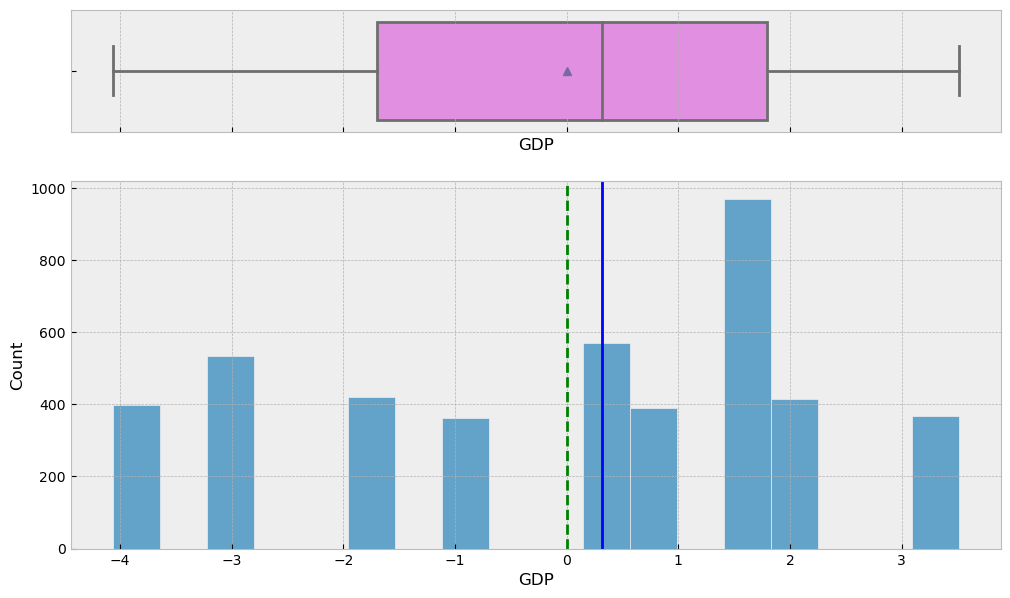

In [100]:
# Generate a combined histogram and boxplot for GDP column
hist_box(student, 'GDP')

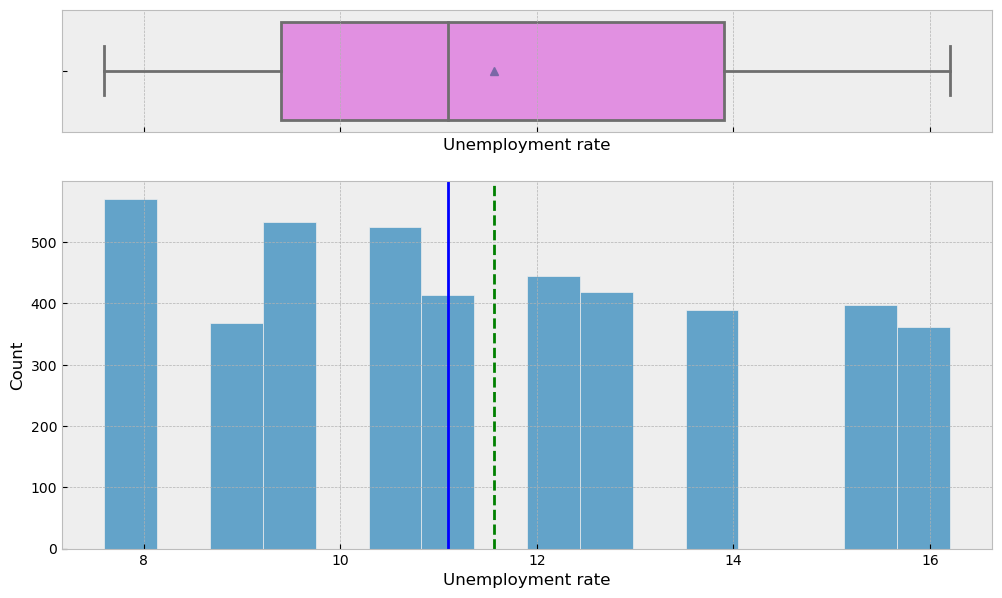

In [101]:
hist_box(student, 'Unemployment rate')

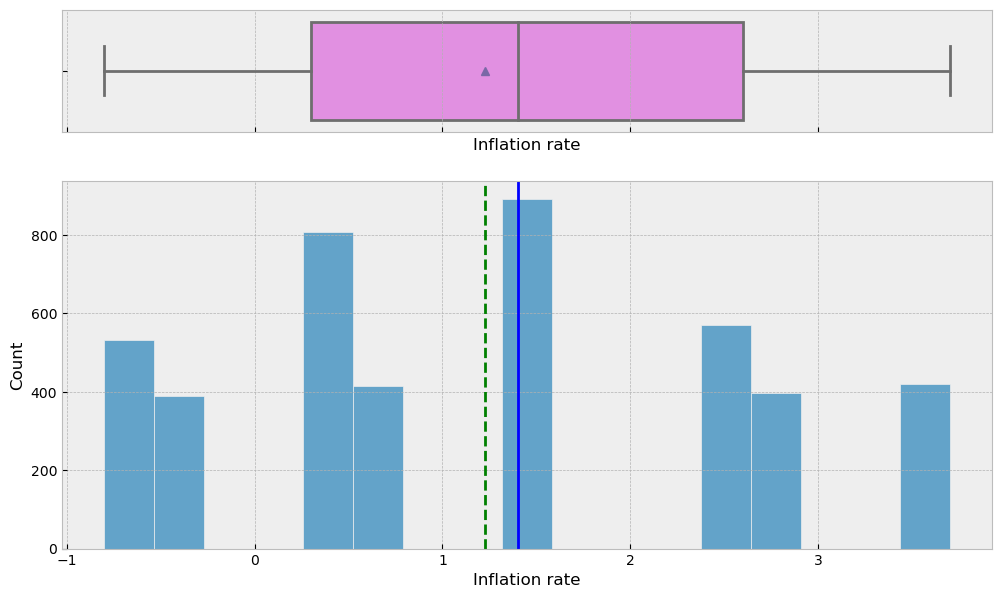

In [102]:
hist_box(student, 'Inflation rate')

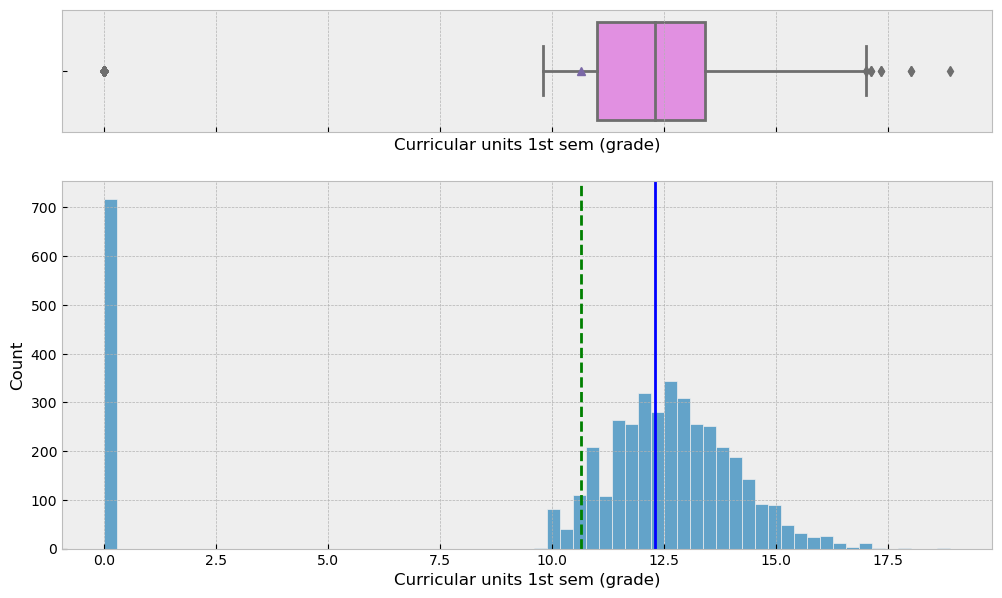

In [103]:
hist_box(student, 'Curricular units 1st sem (grade)')

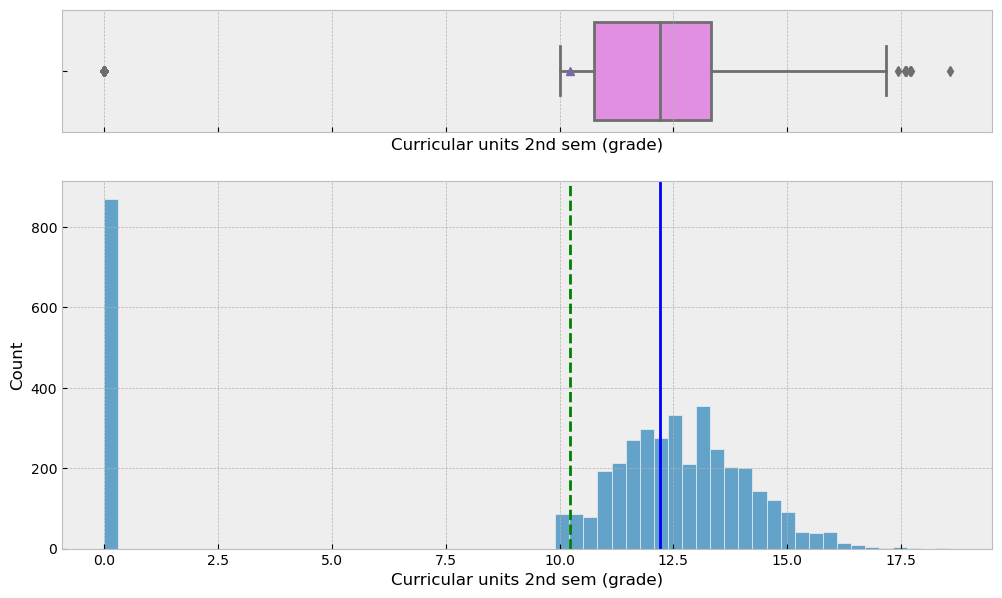

In [104]:
hist_box(student, 'Curricular units 2nd sem (grade)')

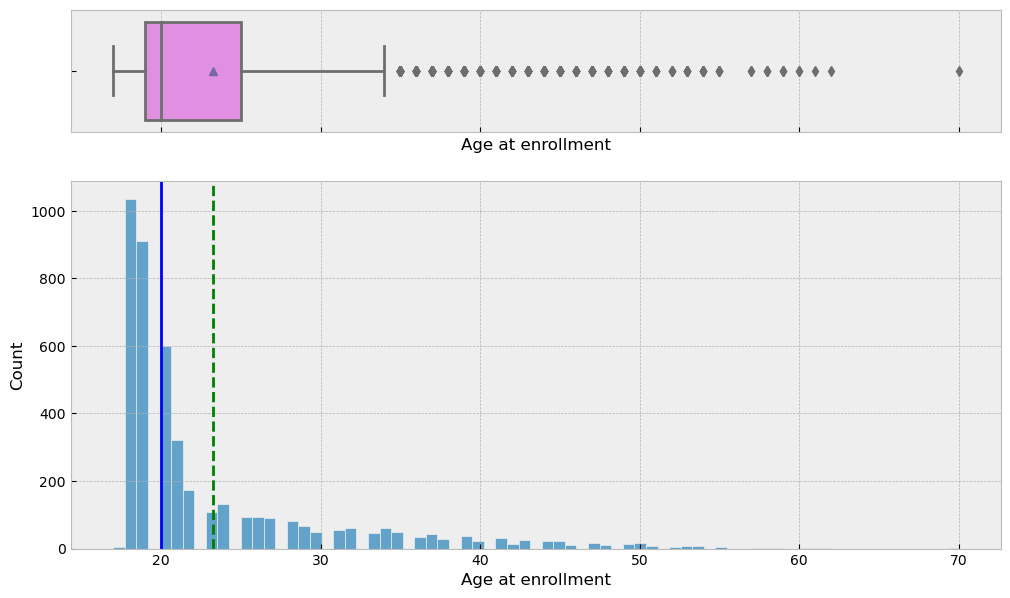

In [105]:
hist_box(student, 'Age at enrollment')

In [107]:
# Generate a stacked bar plot to visualize the relationship between a predictor variable and a target variable.
def stackedbar(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tabl = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tabl)
    print("*"*120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
    plt.legend(
    loc="lower left",
    frameon=False,
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

Target          Dropout  Enrolled  Graduate   All
Marital status                                   
All                1421       794      2209  4424
1                  1184       720      2015  3919
2                   179        52       148   379
4                    42        16        33    91
5                    11         3        11    25
3                     1         2         1     4
6                     4         1         1     6
************************************************************************************************************************


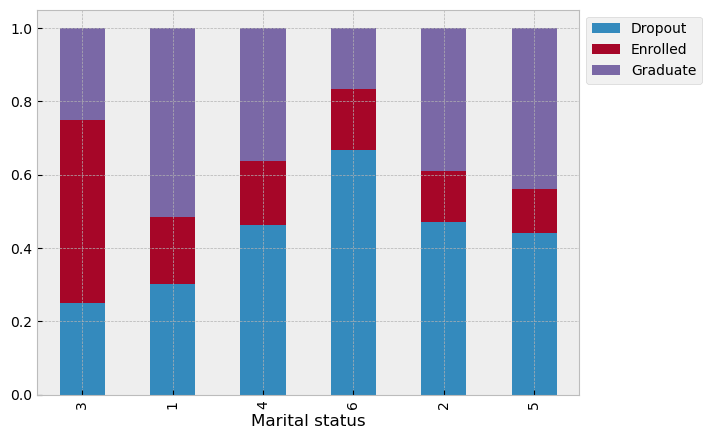

In [108]:
# Generate a stacked bar plot to visualize the relationship between "Marital status" and "Target" variables
stackedbar(student, "Marital status", "Target")

Target            Dropout  Enrolled  Graduate   All
Application mode                                   
All                  1421       794      2209  4424
1                     345       300      1063  1708
8                     256       159       457   872
12                    435       121       229   785
14                    115        75       122   312
15                     63        56        94   213
9                      45        16        63   124
16                     20        13        26    59
13                     34        11        32    77
6                       5        10        15    30
17                      4        10        21    35
3                       2         8         6    16
7                       5         8        25    38
4                      85         7        47   139
18                      0         0         1     1
11                      1         0         0     1
2                       2         0         1     3
5           

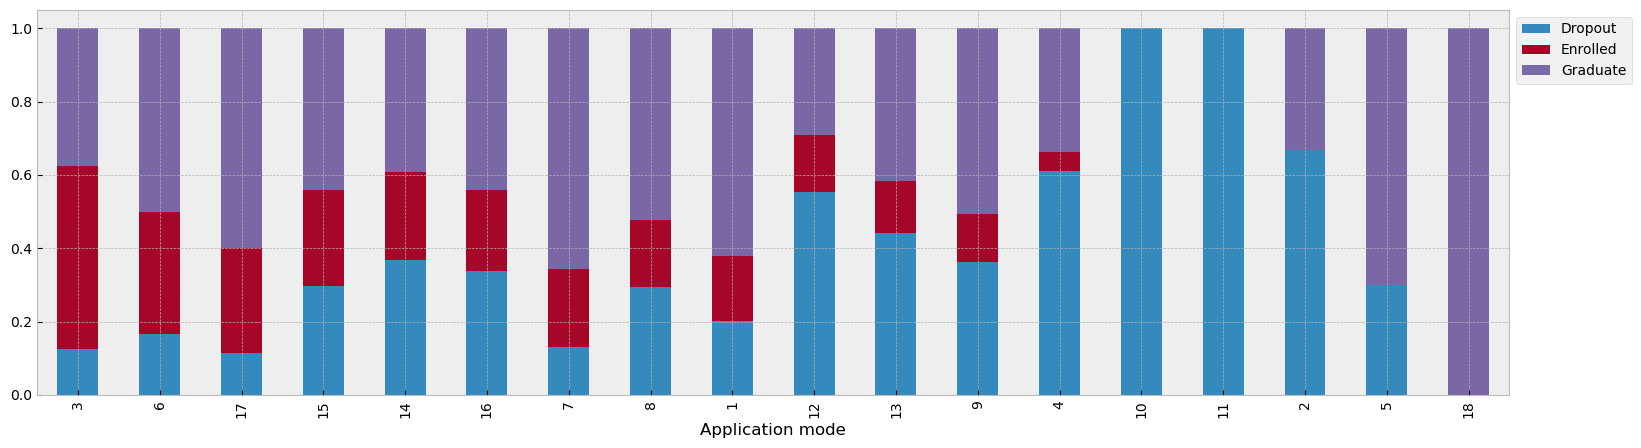

In [109]:
stackedbar(student, "Application mode", "Target")

Target  Dropout  Enrolled  Graduate   All
Course                                   
All        1421       794      2209  4424
9           134       108       138   380
12          118       100       548   766
6            90        75       172   337
7            92        64        14   170
17          136        54        78   268
16           85        50        57   192
14           95        48       125   268
10           65        42       248   355
5            51        42       133   226
11           96        41       115   252
2            82        37        96   215
4            86        37        87   210
15          101        34       196   331
8            78        21        42   141
3            71        21       123   215
13           33        17        36    86
1             8         3         1    12
************************************************************************************************************************


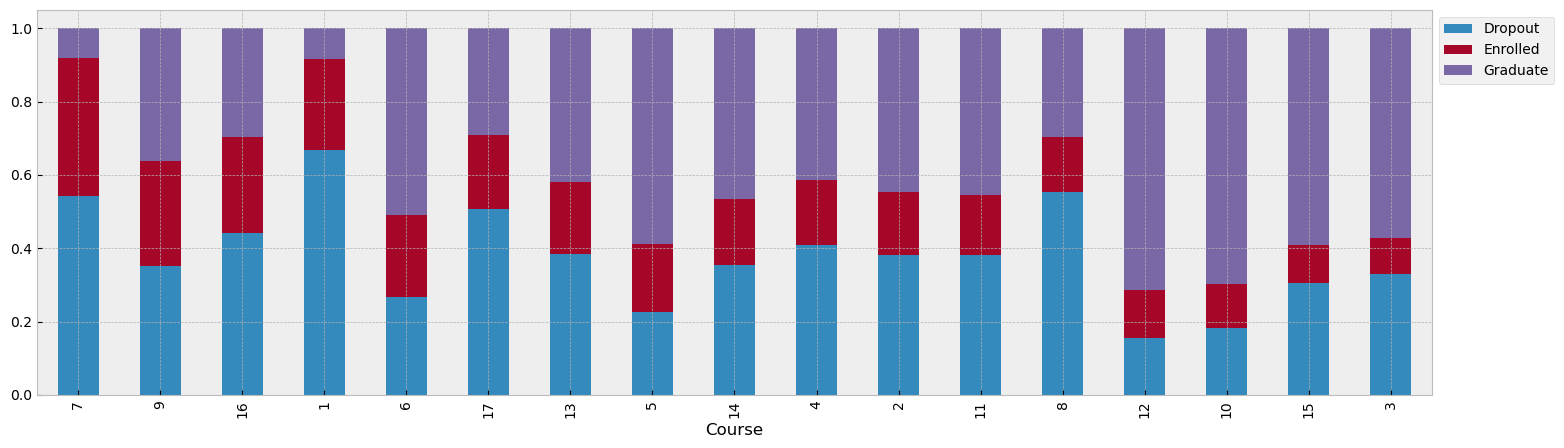

In [110]:
stackedbar(student, "Course", "Target")

Target                      Dropout  Enrolled  Graduate   All
Daytime/evening attendance                                   
All                            1421       794      2209  4424
1                              1214       719      2008  3941
0                               207        75       201   483
************************************************************************************************************************


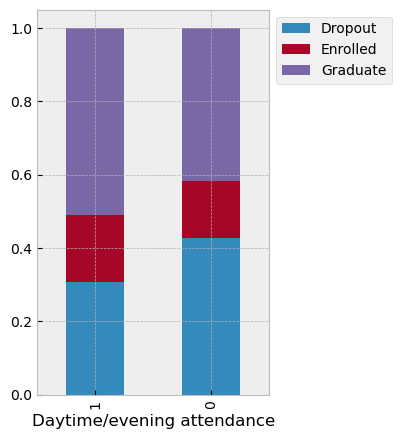

In [111]:
stackedbar(student, "Daytime/evening attendance", "Target")

Target                  Dropout  Enrolled  Graduate   All
Previous qualification                                   
All                        1421       794      2209  4424
1                          1078       698      1941  3717
14                           69        55        95   219
12                          104        13        45   162
16                            6         8        22    36
9                            26         6        13    45
15                           14         6        20    40
3                            75         4        47   126
4                             4         1         3     8
6                             7         1         8    16
2                            16         1         6    23
13                            3         1         3     7
5                             1         0         0     1
7                            11         0         0    11
8                             3         0         1     4
11            

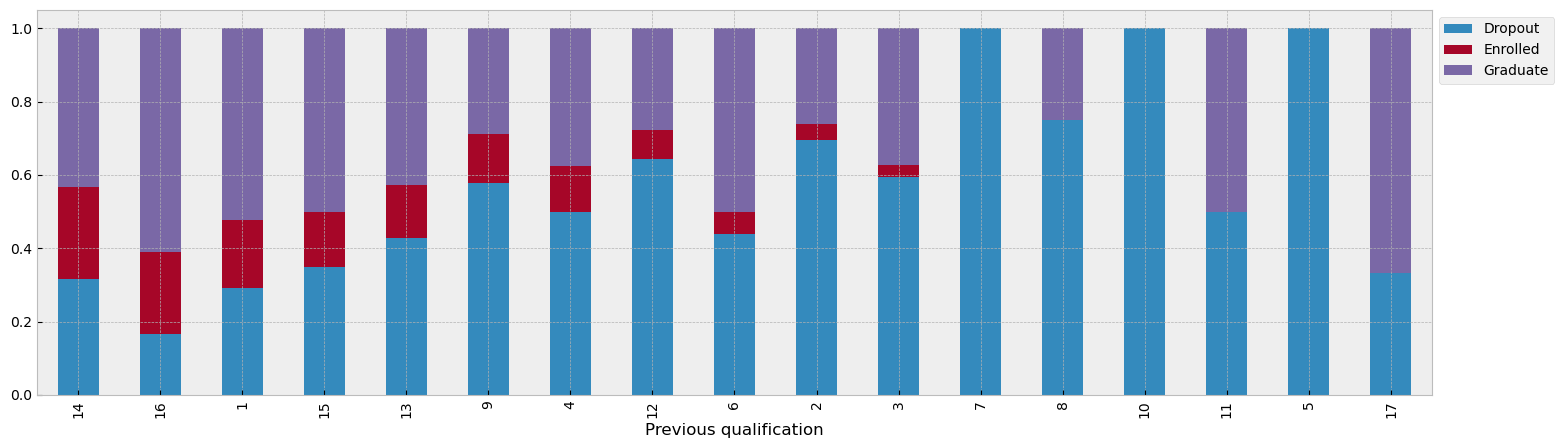

In [112]:
stackedbar(student, "Previous qualification", "Target")

Target       Dropout  Enrolled  Graduate   All
Nacionality                                   
All             1421       794      2209  4424
1               1389       770      2155  4314
14                14         6        18    38
3                  4         5         4    13
12                 1         5         8    14
13                 0         1         0     1
8                  1         1         0     2
9                  4         1         8    13
11                 0         1         1     2
20                 0         1         0     1
19                 1         1         0     2
15                 0         1         1     2
16                 2         1         0     3
17                 1         0         1     2
21                 1         0         0     1
18                 1         0         2     3
6                  0         0         1     1
7                  1         0         0     1
4                  0         0         3     3
2            

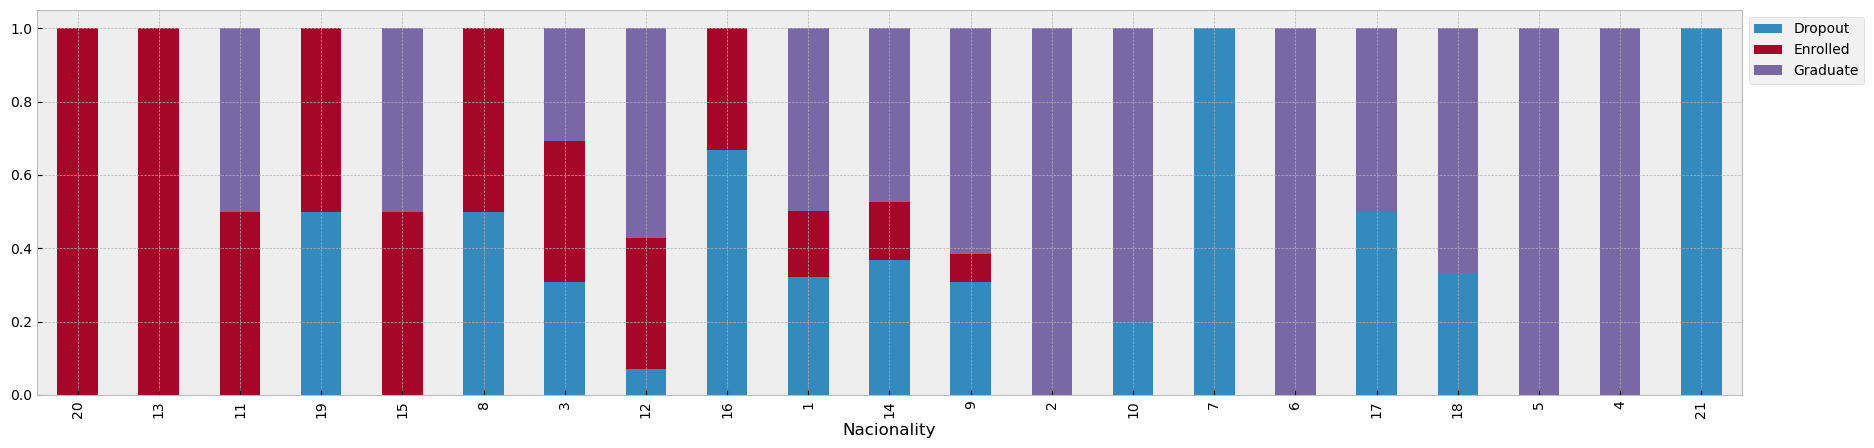

In [113]:
stackedbar(student, "Nacionality", "Target")

Target     Dropout  Enrolled  Graduate   All
Displaced                                   
All           1421       794      2209  4424
1              669       433      1324  2426
0              752       361       885  1998
************************************************************************************************************************


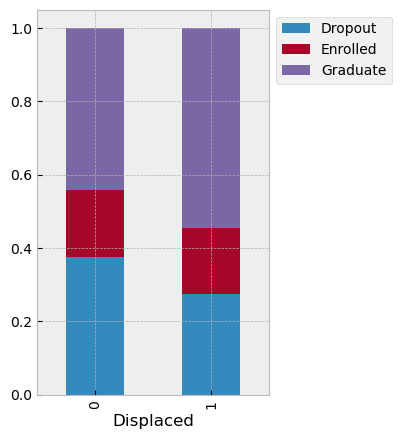

In [114]:
stackedbar(student, "Displaced", "Target")

Target                     Dropout  Enrolled  Graduate   All
Educational special needs                                   
All                           1421       794      2209  4424
0                             1404       783      2186  4373
1                               17        11        23    51
************************************************************************************************************************


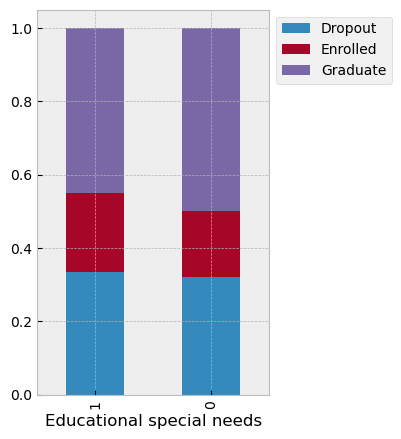

In [115]:
stackedbar(student, "Educational special needs", "Target")

Target  Dropout  Enrolled  Graduate   All
Debtor                                   
All        1421       794      2209  4424
0          1109       704      2108  3921
1           312        90       101   503
************************************************************************************************************************


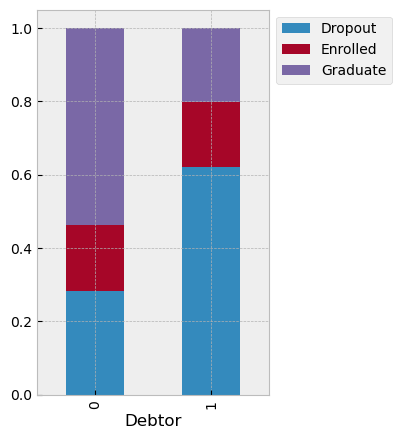

In [116]:
stackedbar(student, "Debtor", "Target")

Target                   Dropout  Enrolled  Graduate   All
Tuition fees up to date                                   
All                         1421       794      2209  4424
1                            964       752      2180  3896
0                            457        42        29   528
************************************************************************************************************************


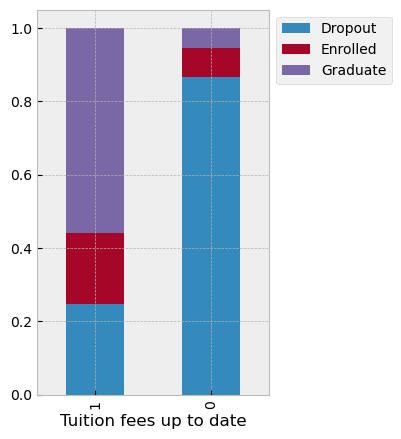

In [117]:
stackedbar(student, "Tuition fees up to date", "Target")

Target  Dropout  Enrolled  Graduate   All
Gender                                   
All        1421       794      2209  4424
0           720       487      1661  2868
1           701       307       548  1556
************************************************************************************************************************


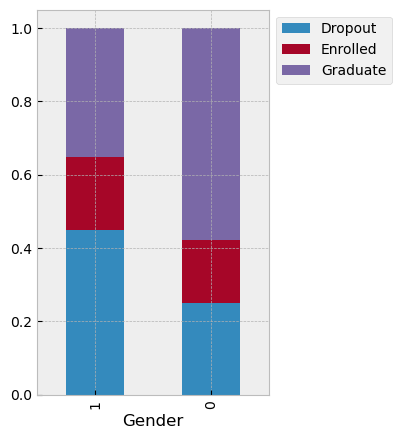

In [118]:
stackedbar(student, "Gender", "Target")

Target              Dropout  Enrolled  Graduate   All
Scholarship holder                                   
All                    1421       794      2209  4424
0                      1287       664      1374  3325
1                       134       130       835  1099
************************************************************************************************************************


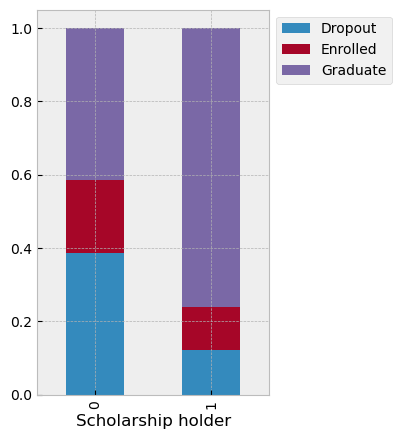

In [119]:
stackedbar(student, "Scholarship holder", "Target")

Target             Dropout  Enrolled  Graduate   All
Age at enrollment                                   
All                   1421       794      2209  4424
18                     202       172       662  1036
19                     207       157       547   911
20                     133       140       326   599
21                      93        70       159   322
22                      58        37        79   174
24                      56        30        45   131
23                      41        24        43   108
25                      47        21        25    93
26                      52        19        23    94
28                      47        15        21    83
27                      55        12        24    91
34                      29        12        19    60
33                      20         8        17    45
31                      36         7        12    55
30                      30         6        13    49
29                      45         5        16

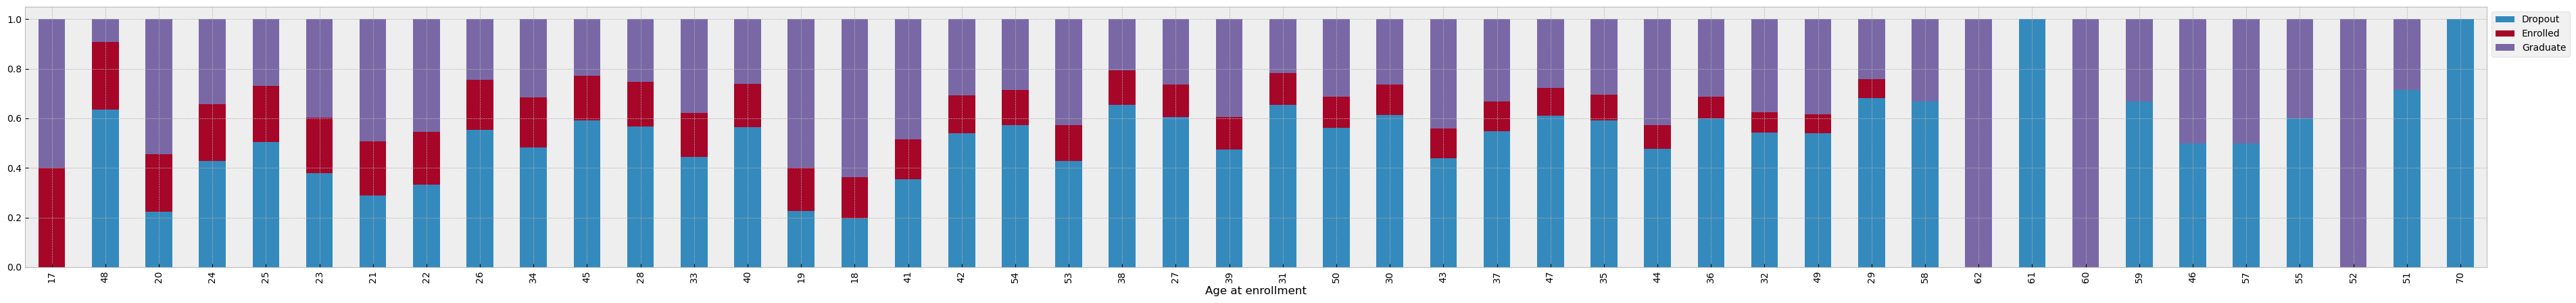

In [120]:
stackedbar(student, "Age at enrollment", "Target")

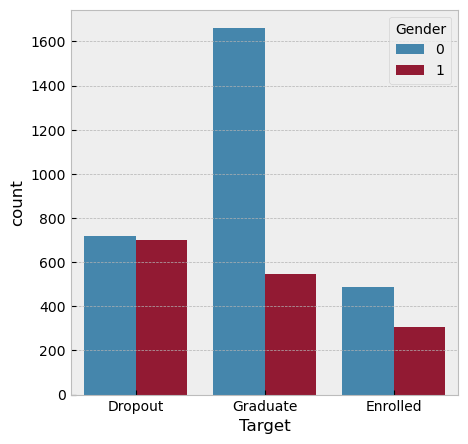

In [122]:
# Create a count plot to visualize the distribution of the 'Target' variable with counts further broken down by 'Gender'
plt.figure(figsize=(5,5))
sns.countplot(x = 'Target', data=student ,hue = 'Gender')
plt.show()

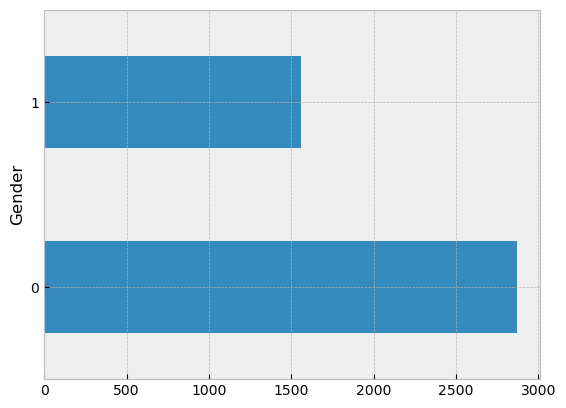

In [123]:
# Group the 'student' DataFrame by 'Gender', count the occurrences of each unique value in the 'Target' variable,
# and create a horizontal bar plot to visualize these counts
student.groupby('Gender').Target.count().plot(kind='barh')
plt.show()

In [124]:
# contigency table between the gender and age at enrollment
pd.crosstab(student['Gender'], student['Age at enrollment'])

Age at enrollment,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,60,61,62,70
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,789,650,403,202,89,60,71,38,54,48,44,35,26,32,37,23,33,24,18,21,16,29,11,19,6,11,10,12,8,7,7,2,10,3,1,4,4,2,0,2,2,1,0,1,0
1,2,247,261,196,120,85,48,60,55,40,43,39,31,23,23,24,22,27,25,17,21,13,9,12,12,7,14,11,10,4,11,4,11,6,4,3,3,3,3,2,1,1,1,1,0,1


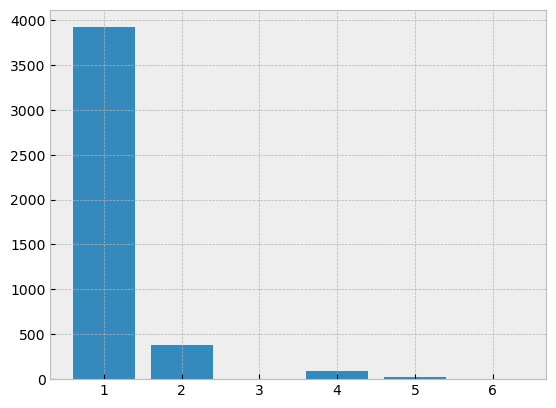

In [125]:
summary=student.groupby('Marital status').Gender.count()
plt.bar(x=summary.index , height=summary.values)
plt.show()

<Axes: xlabel='Marital status', ylabel='count'>

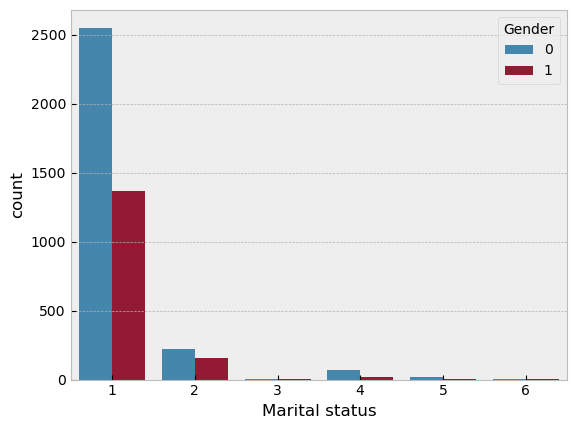

In [126]:
sns.countplot(data = student, x = 'Marital status', hue = 'Gender')

In [127]:
summary2= pd.crosstab(student['Marital status'], student['Gender'])
summary2

Gender,0,1
Marital status,,
1,2552,1367
2,221,158
3,3,1
4,69,22
5,18,7
6,5,1


<Axes: xlabel='Marital status'>

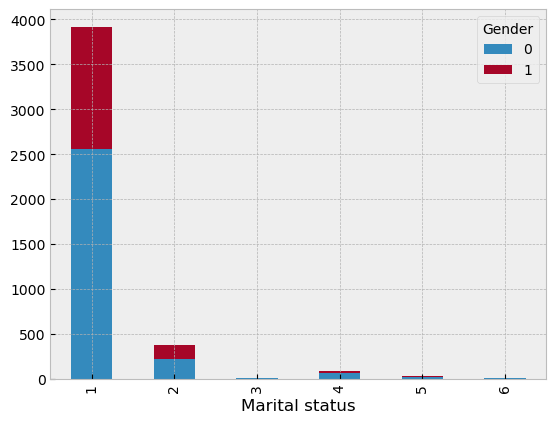

In [128]:
summary2.plot(kind = 'bar', stacked = True)

<Axes: xlabel='Gender', ylabel='Unemployment rate'>

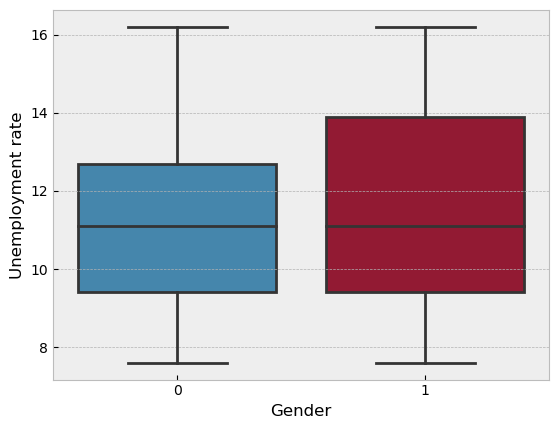

In [129]:
sns.boxplot(data = student, y = 'Unemployment rate', x = 'Gender')

<Axes: xlabel='Marital status', ylabel='Unemployment rate'>

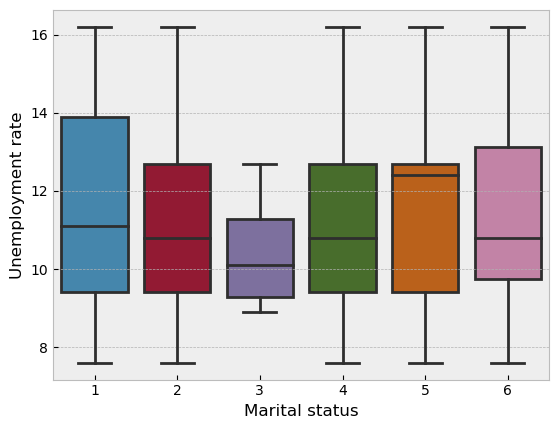

In [130]:
plt.style.use('bmh')
sns.boxplot(data = student, y = 'Unemployment rate', x = 'Marital status')

In [131]:
# Define a list of columns to be dropped from the 'student' DataFrame
drop_cols = ['Application mode','Course','Previous qualification','Nacionality',"Mother's qualification","Father's qualification",
            "Mother's occupation","Father's occupation"]
# Drop the specified columns from the DataFrame
student.drop(drop_cols, axis = 1, inplace = True)
# Display the first few rows of the modified DataFrame
student.head()

,Marital status,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,1,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,0,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [132]:
# Calculate the average number of enrolled curricular units per semester
student['Curricular enrolled_u per sem'] = (student['Curricular units 1st sem (enrolled)'] + student['Curricular units 2nd sem (enrolled)']) / 2

# Calculate the average number of evaluated curricular units per semester
student['Curricular evaluation_u per sem'] = (student['Curricular units 1st sem (evaluations)'] + student['Curricular units 2nd sem (evaluations)']) / 2

# Calculate the average number of approved curricular units per semester
student['Curricular approved_u per sem'] = (student['Curricular units 1st sem (approved)'] + student['Curricular units 2nd sem (approved)']) / 2

# Calculate the average grade of curricular units per semester
student['Curricular grade_u per sem'] = (student['Curricular units 1st sem (grade)'] + student['Curricular units 2nd sem (grade)']) / 2

# Calculate the average number of curricular units per semester without evaluations
student['Curricular w/o_evaluation_u per sem'] = (student['Curricular units 1st sem (without evaluations)'] + student['Curricular units 2nd sem (without evaluations)']) / 2

# Display the last 25 rows of the DataFrame
student.tail(25)

,Marital status,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem
4399,1,1,1,1,0,0,1,0,1,22,0,0,6,9,6,13.875000,0,0,6,6,6,14.333333,0,9.4,-0.8,-3.12,Graduate,6.0,7.5,6.0,14.104167,0.0
4400,2,1,0,0,0,1,1,1,0,37,0,0,5,10,4,10.750000,0,0,5,12,3,13.333333,0,9.4,-0.8,-3.12,Dropout,5.0,11.0,3.5,12.041667,0.0
4401,1,1,1,0,0,0,1,1,0,24,0,3,5,10,3,14.666667,1,0,5,5,0,0.000000,0,7.6,2.6,0.32,Dropout,5.0,7.5,1.5,7.333333,0.5
4402,1,2,1,1,0,0,1,1,0,18,0,0,6,7,5,12.600000,0,0,6,6,6,13.000000,0,10.8,1.4,1.74,Enrolled,6.0,6.5,5.5,12.800000,0.0
4403,1,3,1,1,0,0,1,1,1,19,0,0,7,11,6,12.412500,0,0,8,12,7,11.262500,0,15.5,2.8,-4.06,Graduate,7.5,11.5,6.5,11.837500,0.0
4404,2,1,1,1,0,1,0,1,0,28,0,0,6,12,1,11.000000,0,0,6,9,2,10.500000,0,16.2,0.3,-0.92,Dropout,6.0,10.5,1.5,10.750000,0.0
4405,1,4,1,1,0,0,1,1,1,18,0,0,8,8,7,14.314286,0,0,8,8,7,14.314286,0,12.7,3.7,-1.70,Graduate,8.0,8.0,7.0,14.314286,0.0
4406,1,1,1,1,0,0,1,1,0,20,0,0,6,6,4,12.000000,0,0,6,8,2,11.333333,0,10.8,1.4,1.74,Enrolled,6.0,7.0,3.0,11.666667,0.0
4407,1,1,1,1,0,0,1,1,0,18,0,0,6,6,6,12.833333,0,0,6,7,6,13.285714,0,15.5,2.8,-4.06,Graduate,6.0,6.5,6.0,13.059524,0.0
4408,2,1,1,0,0,0,1,1,0,47,0,0,6,8,5,11.400000,0,0,6,10,6,11.666667,0,12.7,3.7,-1.70,Dropout,6.0,9.0,5.5,11.533333,0.0


In [133]:
# Define a list of columns to be dropped from the 'student' DataFrame
drop_cols = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
             "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)", 
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']

# Drop the specified columns from the DataFrame
student.drop(drop_cols, axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
student.head()


,Marital status,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem
0,1,5,1,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.000000,0.0
1,1,1,1,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate,6.0,6.0,6.0,13.833333,0.0
2,1,5,1,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout,6.0,0.0,0.0,0.000000,0.0
3,1,2,1,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate,6.0,9.0,5.5,12.914286,0.0
4,2,1,0,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate,6.0,7.5,5.5,12.666667,0.0


In [134]:
# Perform one-hot encoding for categorical variables in the 'student' DataFrame
encode = ['Marital status', 'Daytime/evening attendance', 'Displaced', 'Educational special needs',
          'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

for col in encode:
    dummy = pd.get_dummies(student[col], prefix=col)
    student = pd.concat([student, dummy], axis=1)
    del student[col]
student.head()

,Application order,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Daytime/evening attendance_0,Daytime/evening attendance_1,Displaced_0,Displaced_1,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,5,20,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,True,True,False,True,False
1,1,19,13.9,-0.3,0.79,Graduate,6.0,6.0,6.0,13.833333,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False
2,5,19,10.8,1.4,1.74,Dropout,6.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False
3,2,20,9.4,-0.8,-3.12,Graduate,6.0,9.0,5.5,12.914286,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False
4,1,45,13.9,-0.3,0.79,Graduate,6.0,7.5,5.5,12.666667,0.0,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False


In [135]:
student_ed = student[:1]
student_ed.head()

,Application order,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Daytime/evening attendance_0,Daytime/evening attendance_1,Displaced_0,Displaced_1,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,5,20,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,True,True,False,True,False


In [138]:
train_data = student
train_data.head()

,Application order,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Daytime/evening attendance_0,Daytime/evening attendance_1,Displaced_0,Displaced_1,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,5,20,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,True,True,False,True,False
1,1,19,13.9,-0.3,0.79,Graduate,6.0,6.0,6.0,13.833333,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False
2,5,19,10.8,1.4,1.74,Dropout,6.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False
3,2,20,9.4,-0.8,-3.12,Graduate,6.0,9.0,5.5,12.914286,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False
4,1,45,13.9,-0.3,0.79,Graduate,6.0,7.5,5.5,12.666667,0.0,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False


In [139]:
le = preprocessing.LabelEncoder()
train_data['target'] = le.fit_transform(train_data['Target'])
train_data.head()

,Application order,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Daytime/evening attendance_0,Daytime/evening attendance_1,Displaced_0,Displaced_1,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1,target
0,5,20,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,True,True,False,True,False,0
1,1,19,13.9,-0.3,0.79,Graduate,6.0,6.0,6.0,13.833333,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False,2
2,5,19,10.8,1.4,1.74,Dropout,6.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False,0
3,2,20,9.4,-0.8,-3.12,Graduate,6.0,9.0,5.5,12.914286,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False,2
4,1,45,13.9,-0.3,0.79,Graduate,6.0,7.5,5.5,12.666667,0.0,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,2


In [140]:
train_data.drop('Target', axis = 1, inplace = True)
train_data.head()

,Application order,Age at enrollment,Unemployment rate,Inflation rate,GDP,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Daytime/evening attendance_0,Daytime/evening attendance_1,Displaced_0,Displaced_1,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1,target
0,5,20,10.8,1.4,1.74,0.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,True,True,False,True,False,0
1,1,19,13.9,-0.3,0.79,6.0,6.0,6.0,13.833333,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False,2
2,5,19,10.8,1.4,1.74,6.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False,0
3,2,20,9.4,-0.8,-3.12,6.0,9.0,5.5,12.914286,0.0,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False,2
4,1,45,13.9,-0.3,0.79,6.0,7.5,5.5,12.666667,0.0,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,2


In [141]:
columns = ['Application order','Age at enrollment','Unemployment rate','Inflation rate','GDP','Curricular enrolled_u per sem',
           'Curricular evaluation_u per sem','Curricular approved_u per sem','Curricular grade_u per sem',
           'Curricular w/o_evaluation_u per sem','Marital status_1','Marital status_2','Marital status_3','Marital status_4',
           'Marital status_5','Daytime/evening attendance_1','Displaced_1','Educational special needs_1','Debtor_1',
           'Tuition fees up to date_1','Gender_1','Scholarship holder_1','International_1']
x = train_data[columns]
x.head()

,Application order,Age at enrollment,Unemployment rate,Inflation rate,GDP,Curricular enrolled_u per sem,Curricular evaluation_u per sem,Curricular approved_u per sem,Curricular grade_u per sem,Curricular w/o_evaluation_u per sem,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Daytime/evening attendance_1,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,5,20,10.8,1.4,1.74,0.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,True,True,False,False,True,True,False,False
1,1,19,13.9,-0.3,0.79,6.0,6.0,6.0,13.833333,0.0,True,False,False,False,False,True,True,False,False,False,True,False,False
2,5,19,10.8,1.4,1.74,6.0,0.0,0.0,0.000000,0.0,True,False,False,False,False,True,True,False,False,False,True,False,False
3,2,20,9.4,-0.8,-3.12,6.0,9.0,5.5,12.914286,0.0,True,False,False,False,False,True,True,False,False,True,False,False,False
4,1,45,13.9,-0.3,0.79,6.0,7.5,5.5,12.666667,0.0,False,True,False,False,False,False,False,False,False,True,False,False,False


In [142]:
y = train_data['target']
y.head()

0    0
1    2
2    0
3    2
4    2
Name: target, dtype: int32

In [143]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

In [144]:
X_data = min_max_scaler.fit_transform(x)
X_data

array([[0.55555556, 0.05660377, 0.37209302, ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.03773585, 0.73255814, ..., 1.        , 0.        ,
        0.        ],
       [0.55555556, 0.03773585, 0.37209302, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.11111111, 0.24528302, 0.73255814, ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.05660377, 0.20930233, ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.09433962, 0.59302326, ..., 0.        , 0.        ,
        1.        ]])

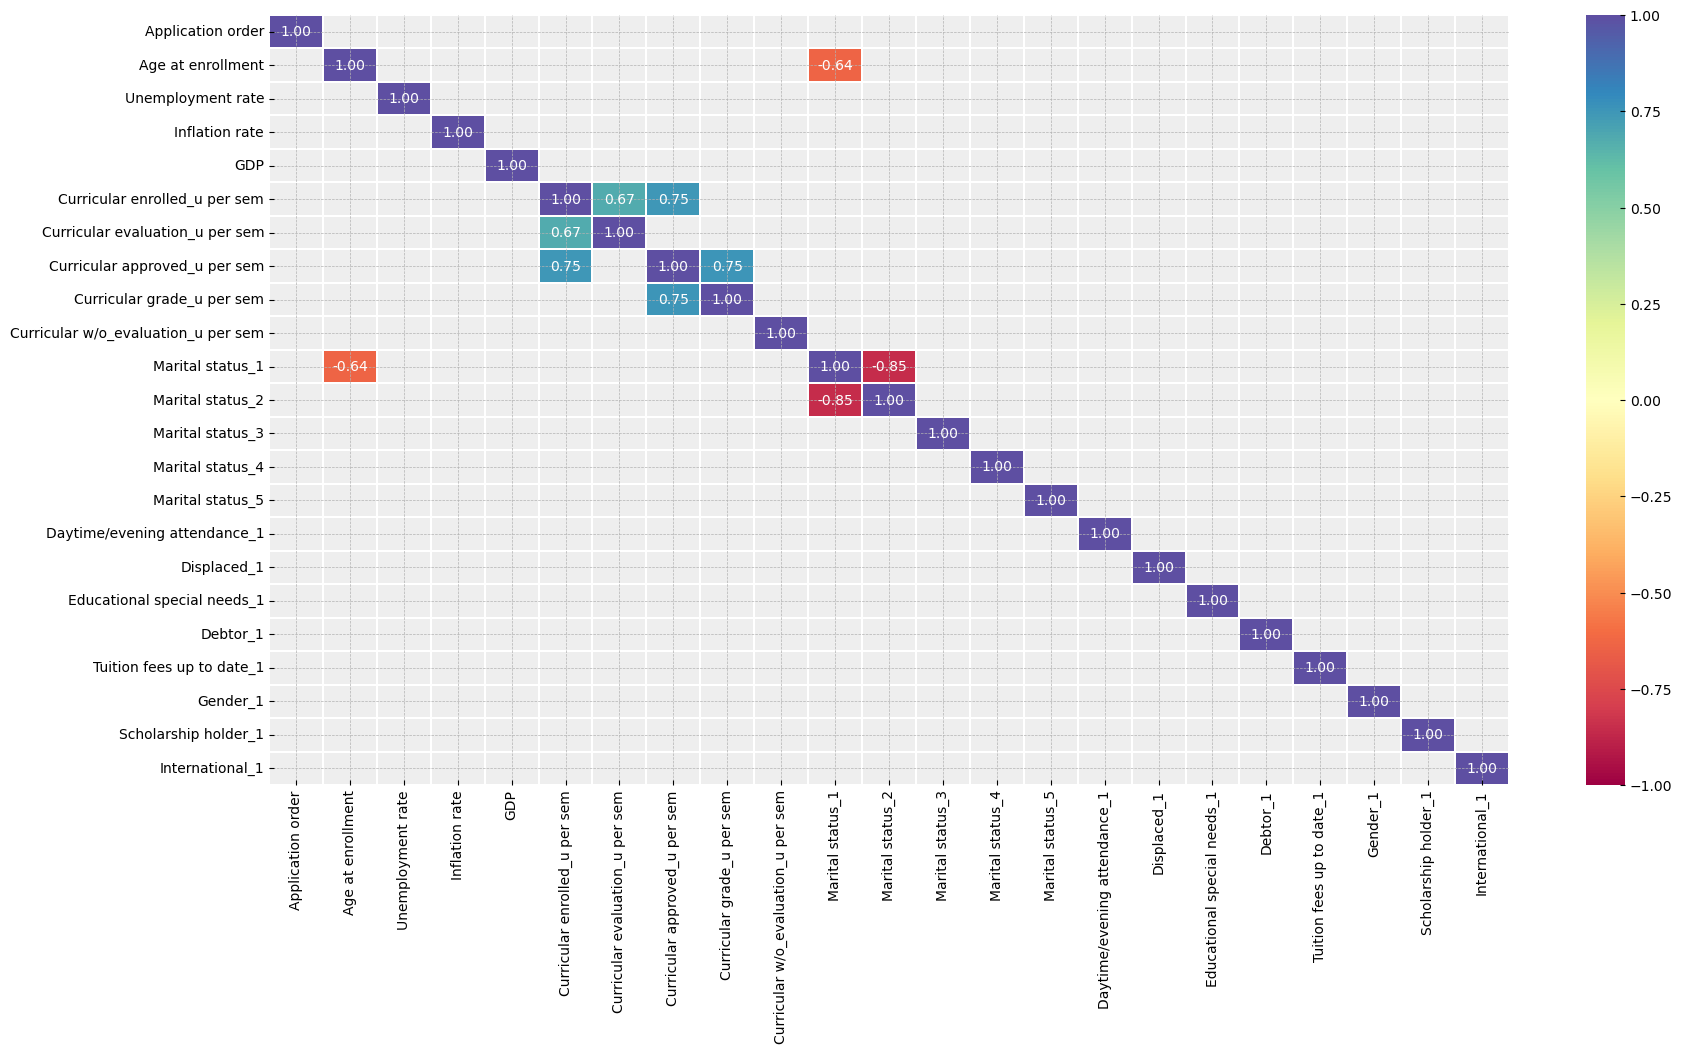

In [165]:
# Visualize correlation matrix
cor = x.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(cor[(cor >= 0.6) | (cor <= -0.6)], annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral', linewidths=0.1)
plt.show()

In [166]:
# Importing necessary libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

# Define feature matrix (X) and target vector (Y)
X = train_data.drop('target', axis=1)  # Feature matrix X by dropping the target column from train_data
Y = train_data['target']  # Target vector Y containing the 'target' column from train_data

# Feature selection using SelectFromModel
selector = SelectFromModel(rf(n_estimators=100, random_state=0))  # Initializing SelectFromModel with RandomForestClassifier
selector.fit(X, Y)  # Fitting the selector to the data
support = selector.get_support()  # Obtaining the selected features
features = X.loc[:, support].columns.tolist()  # Getting the names of selected features
print(features)  # Printing the selected features

# Feature importance analysis using RandomForestClassifier
# Here we're fitting a new RandomForestClassifier to get feature importances
print(rf(n_estimators=100, random_state=0).fit(X, Y).feature_importances_)  # Printing feature importances


['Application order', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular enrolled_u per sem', 'Curricular evaluation_u per sem', 'Curricular approved_u per sem', 'Curricular grade_u per sem', 'Tuition fees up to date_0', 'Tuition fees up to date_1']
[3.45741499e-02 8.00803399e-02 4.02292065e-02 3.85028072e-02
 4.11802743e-02 5.59753837e-02 9.39514313e-02 2.23206561e-01
 1.74335650e-01 1.62214594e-02 5.07043974e-03 4.40300767e-03
 2.82736803e-04 1.86608170e-03 7.75645888e-04 1.56306573e-04
 5.60425858e-03 4.94353696e-03 1.23136518e-02 1.24335467e-02
 1.73668436e-03 1.79844515e-03 1.08229563e-02 1.06287726e-02
 3.13201690e-02 3.22498735e-02 1.31276374e-02 1.29653365e-02
 1.68208155e-02 1.64027032e-02 3.29365580e-03 2.72647548e-03]


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2, random_state = 0)

In [168]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import itertools  # Import itertools for matrix iteration
import numpy as np  # Import numpy for array operations

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    # Fit the model to the training data
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    # Predict labels for test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate time taken for training and prediction
    time_taken = time.time() - t0

    # Print accuracy and time taken
    print("Accuracy = {}".format(accuracy))
    print("Time taken = {}".format(time_taken))

    # Print classification report
    print(classification_report(y_test, y_pred, digits=5))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = model.classes_  # Get class names from model
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(cm, classes=class_names, ax=ax)

    return model, accuracy, time_taken

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# SVM Classifier

In [176]:
from sklearn.svm import SVC
params_svc = {'C': 100, 'gamma':0.1, 'kernel': 'rbf'}
model_svc = SVC(**params_svc)
model_svc, accuracy_svc, tt_svc = run_model(model_svc, X_train, y_train, X_test, y_test)

Accuracy = 0.7740112994350282
Time taken = 0.5678985118865967
              precision    recall  f1-score   support

           0    0.82591   0.71831   0.76836       284
           1    0.51095   0.46358   0.48611       151
           2    0.82036   0.91333   0.86435       450

    accuracy                        0.77401       885
   macro avg    0.71907   0.69841   0.70628       885
weighted avg    0.76935   0.77401   0.76901       885



# RF Classifier

In [191]:
import time
import pickle
from joblib import dump
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    # Fit the model to the training data
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    # Predict labels for test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate time taken for training and prediction
    time_taken = time.time() - t0

    # Print accuracy and time taken
    print("Accuracy = {}".format(accuracy))
    print("Time taken = {}".format(time_taken))

    # Print classification report
    print(classification_report(y_test, y_pred, digits=5))

    return model, accuracy, time_taken

# Parameters for RandomForestClassifier
params_rf = {'bootstrap': True,
             'max_depth': 32,
             'max_features': 9,
             'min_samples_leaf': 6,
             'min_samples_split': 14,
             'n_estimators': 128}

# Initialize RandomForestClassifier with specified parameters
model_rf = RandomForestClassifier(**params_rf)

# Run the model
model_rf, accuracy_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

from joblib import dump
dump(model_rf, 'random_forest_model.joblib')



Accuracy = 0.7742663656884876
Time taken = 0.9097719192504883
              precision    recall  f1-score   support

           0    0.77143   0.71053   0.73973       114
           1    0.50000   0.27848   0.35772        79
           2    0.81633   0.96000   0.88235       250

    accuracy                        0.77427       443
   macro avg    0.69592   0.64967   0.65993       443
weighted avg    0.74836   0.77427   0.75209       443



['random_forest_model.joblib']

# XGB Classifier

In [180]:
from xgboost import XGBClassifier

In [181]:
params_xgb = {'n_estimators':50, 'max_depth':5}
model_xgb = XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

Accuracy = 0.792090395480226
Time taken = 0.14455962181091309
              precision    recall  f1-score   support

           0    0.82422   0.74296   0.78148       284
           1    0.56028   0.52318   0.54110       151
           2    0.84221   0.91333   0.87633       450

    accuracy                        0.79209       885
   macro avg    0.74224   0.72649   0.73297       885
weighted avg    0.78834   0.79209   0.78870       885



# CB CLassifier

In [182]:
from catboost import CatBoostClassifier
param_cb = {
    'iterations': 100,
    'max_depth': 8,
    'learning_rate': 0.09
}
model_cb = CatBoostClassifier(**param_cb)
model_cb, accuracy_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test)

0:	learn: 1.0272068	total: 179ms	remaining: 17.7s
1:	learn: 0.9713366	total: 195ms	remaining: 9.58s
2:	learn: 0.9287570	total: 216ms	remaining: 6.99s
3:	learn: 0.8913400	total: 234ms	remaining: 5.63s
4:	learn: 0.8572972	total: 252ms	remaining: 4.79s
5:	learn: 0.8293742	total: 269ms	remaining: 4.21s
6:	learn: 0.8042903	total: 285ms	remaining: 3.79s
7:	learn: 0.7821429	total: 304ms	remaining: 3.5s
8:	learn: 0.7605156	total: 325ms	remaining: 3.29s
9:	learn: 0.7440965	total: 343ms	remaining: 3.08s
10:	learn: 0.7285932	total: 360ms	remaining: 2.91s
11:	learn: 0.7168501	total: 370ms	remaining: 2.71s
12:	learn: 0.7050566	total: 387ms	remaining: 2.59s
13:	learn: 0.6933407	total: 406ms	remaining: 2.49s
14:	learn: 0.6818428	total: 421ms	remaining: 2.38s
15:	learn: 0.6710957	total: 438ms	remaining: 2.3s
16:	learn: 0.6611527	total: 456ms	remaining: 2.23s
17:	learn: 0.6535361	total: 472ms	remaining: 2.15s
18:	learn: 0.6462749	total: 477ms	remaining: 2.03s
19:	learn: 0.6398261	total: 493ms	remaining

# Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
param_lr = {
    'C': 10,
    'penalty': 'l2',
    'solver': 'newton-cg'
}

model_lr = LogisticRegression(**param_lr)
model_lr, accuracy_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.7830508474576271
Time taken = 0.1790904998779297
              precision    recall  f1-score   support

           0    0.80297   0.76056   0.78119       284
           1    0.54639   0.35099   0.42742       151
           2    0.81696   0.94222   0.87513       450

    accuracy                        0.78305       885
   macro avg    0.72211   0.68459   0.69458       885
weighted avg    0.76630   0.78305   0.76860       885

